In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 3000
%matplotlib inline

In [2]:
#add encoding to load csv properly
data= pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding = "ISO-8859-1")
j = data

In [3]:
#the dataframe has columun names that will be hard to use
list(j)

['PMID/PMCID',
 'Publisher',
 'Journal title',
 'Article title',
 'COST (£) charged to Wellcome (inc VAT when charged)']

In [4]:
#clean up column names for a more useable format
j.columns = j.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '').str.replace('£', '')
j= j.rename(columns = {'cost__charged_to_wellcome_inc_vat_when_charged':'cost', 'pmidpmcid': 'pmid_pmcid'})
list(j)

['pmid_pmcid', 'publisher', 'journal_title', 'article_title', 'cost']

In [5]:
j.describe()

,pmid_pmcid,publisher,journal_title,article_title,cost
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,Not yet available,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


In [6]:
#remove missing values (NaN)
j.loc[j['journal_title'].isna(),'journal_title'] = 'Unknown'
j.loc[j['pmid_pmcid'].isna(),'pmid_pmcid'] = 'Unknown'

In [7]:
#removed the currecny symbols from cost and made sure it was numeric/float
j['cost']=j.cost.str.replace('£','').str.replace('$', '')
j['cost']=pd.to_numeric(j['cost'])

In [8]:
#update journal_title column to lower case for cleaner results
j['journal_title']=j.journal_title.str.lower().str.strip().str.replace('&', 'and').str.replace('.', '')

In [9]:
j.journal_title.value_counts().head(60)

plos one                                                   190
journal of biological chemistry                             53
neuroimage                                                  29
nucleic acids research                                      26
plos genetics                                               24
plos pathogens                                              24
proceedings of the national academy of sciences             22
plos neglected tropical diseases                            20
human molecular genetics                                    19
nature communications                                       19
movement disorders                                          15
brain                                                       14
bmc public health                                           14
journal of neuroscience                                     13
developmental cell                                          12
biochemical journal                                    

In [10]:
#clean-up some journal titles
j.loc[j['journal_title'].str.startswith('acta'),'journal_title'] = 'acta' 
j.loc[j['journal_title'].str.contains('journal of biological checmistry'),'journal_title'] = 'journal of biological checmistry' 
j.loc[j['journal_title'].str.contains('antimicobial' and 'chemotherapy'), 'journal_title']= 'antimicobial agents and chemotherapy'
j.loc[j['journal_title'].str.contains('pnas' or 'proceedings of the national academy of sciences' or 'proc natl acad sci u s a' ), 'journal_title']='proceedings of the national academy of sciences'
j.loc[j['journal_title'].str.contains('embo'), 'journal_title']='embo'
j.loc[j['journal_title'].str.contains('j med chem' or 'journal of medicinal chemistry'), 'journal_title']= 'journal of medicinal chemistry'
j.loc[j['journal_title'].str.contains('journal of biol chem' or 'j biol chem' or 'j biol chemistry' or 'jnl biological chemistry' or 'journal of biological chemistry'), 'journal_title']='journal of biological chemistry'
j.loc[j['journal_title'].str.contains('j infect dis' or 'journal of infectious diseases'), 'journal_title']='journal of infectious diseases'
j.loc[j['journal_title'].str.contains('jaids' or 'journal of acquired immune deficiency syndromes' or 'journal of aids' or 'journal of acquired immune deficiency syndromes (jaids)'), 'journal_title'] = 'journal of acquired immune deficiency syndromes'
j.loc[j['journal_title'].str.contains('neuroimage: clinical' or 'neuroimage' or 'neurolmage'), 'journal_title']= 'neuroimage'
j.loc[j['journal_title'].str.contains('lancet'),'journal_title'] = 'lancet' 
j.loc[j['journal_title'].str.contains('tissue engineering: part a' or'tissue engineering'), 'journal_title']= 'tissue engineering'
j.loc[j['journal_title'].str.contains('human mutation: variation, informatics, and disease'or'human mutation'), 'journal_title']= 'human mutation'


In [11]:
#j.journal_title.value_counts().head(60)

In [12]:
# clean up various mispelled words and characters in journal_title
j['journal_title'] = j['journal_title'].str.replace('americal','american')
j['journal_title'] = j['journal_title'].str.replace('biochem','biochemical')
j['journal_title'] = j['journal_title'].str.replace('journals','journal')
j['journal_title'] = j['journal_title'].str.replace('ophthalmology','opthalmology')
j['journal_title'] = j['journal_title'].str.replace('part a','')
j['journal_title'] = j['journal_title'].str.replace('jrn','journal')
j['journal_title'] = j['journal_title'].str.replace('epidemology','epidemiology')
j['journal_title'] = j['journal_title'].str.replace('heptology','hepatology')
j['journal_title'] = j['journal_title'].str.replace(',','')
j['journal_title'] = j['journal_title'].str.replace('sciences','science')
j['journal_title'] = j['journal_title'].str.replace('experiements','experiments')
j['journal_title'] = j['journal_title'].str.replace('expermiments','experiments')
j['journal_title'] = j['journal_title'].str.replace('epidemiology','epidemiol')
j['journal_title'] = j['journal_title'].str.replace('epidemiol','epidemiology')
j['journal_title'] = j['journal_title'].str.replace('virology','virol')
j['journal_title'] = j['journal_title'].str.replace('virol','virology')
j['journal_title'] = j['journal_title'].str.replace('virological methods','virology')
j['journal_title'] = j['journal_title'].str.replace('mol biol','molecular biology')
j['journal_title'] = j['journal_title'].str.replace('molecular biology and evolution','molecular biology')
j['journal_title'] = j['journal_title'].str.replace('.','')
j['journal_title'] = j['journal_title'].str.replace('behaviour','behavior')
j['journal_title'] = j['journal_title'].str.replace('opinions','opinion')
j['journal_title'] = j['journal_title'].str.replace('psychiatty','psychiatry')
j['journal_title'] = j['journal_title'].str.replace('mol ','molecular')
j['journal_title'] = j['journal_title'].str.replace('am j ','american journal of ')
j['journal_title'] = j['journal_title'].str.replace('int j ','international journal of ')
j['journal_title'] = j['journal_title'].str.replace('visul ','visual')
j['journal_title'] = j['journal_title'].str.replace('jnl ','journal')
j['journal_title'] = j['journal_title'].str.replace('virology journal','virology')
j['journal_title'] = j['journal_title'].str.replace('gentics','genetics')
j['journal_title'] = j['journal_title'].str.replace('biological chemistry','biol chem')
j['journal_title'] = j['journal_title'].str.replace('biol chem','biological chemistry')
j['journal_title'] = j['journal_title'].str.replace('plosone','plos one')
j['journal_title'] = j['journal_title'].str.replace('negected','neglected')

In [26]:
#j.journal_title.value_counts().head(60)

In [25]:
#j.journal_title.value_counts().sort_index(ascending=True)

In [15]:
j.cost.describe()

count      2127.000000
mean      24067.339972
std      146860.665559
min           0.000000
25%        1280.000000
50%        1884.010000
75%        2321.305000
max      999999.000000
Name: cost, dtype: float64

In [16]:
#define cost mean and max to clean some outliers
cost_mean =j.cost.mean()
cost_median =j.cost.median()

In [17]:
#define cost mean and max to clean some outliers
cost_mean =j.cost.mean()
cost_median =j.cost.median()
cost_std =j.cost.std()
cost_max= j.cost.max()

In [18]:
#update high cost outliers with mean
j.loc[j['cost'] == cost_max, 'cost'] = cost_mean

In [19]:
j.cost.describe()

count      2127.000000
mean       2502.324447
std        6848.774881
min           0.000000
25%        1280.000000
50%        1884.010000
75%        2321.305000
max      201024.000000
Name: cost, dtype: float64

In [20]:
#clean additional outliers
j.loc[j['cost'] > 6000, 'cost'] = 6000

In [21]:
j.cost.describe()

count    2127.000000
mean     1920.268039
std       988.113310
min         0.000000
25%      1280.000000
50%      1884.010000
75%      2321.305000
max      6000.000000
Name: cost, dtype: float64

''

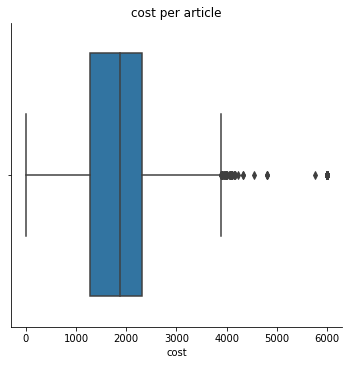

In [22]:
sns.catplot(x="cost",
            kind="box", dodge=False, data=j)
plt.title('cost per article')
;

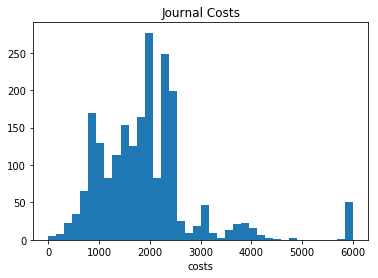

avg cost:  24067.34
median cost:  1884.01
std of cost:  146860.67


In [23]:
plt.hist(j.cost, bins='auto')
plt.title('Journal Costs')
plt.xlabel('costs')
plt.show()
print("avg cost: ", round((cost_mean),2))
print("median cost: ", round((cost_median),2))
print("std of cost: ", round((cost_std),2));

In [24]:
j.groupby(['journal_title'])['cost'].describe().sort_values(by='count', ascending=False).head(5)

,count,mean,std,min,25%,50%,75%,max
journal_title,,,,,,,,
plos one,199.0,1161.117940,1073.382212,122.31,851.655,897.190,1044.6400,6000.00
journal of biological chemistry,54.0,1501.512407,744.875308,265.67,1151.130,1301.140,1610.1475,6000.00
neuroimage,34.0,2050.756176,472.211498,987.75,1762.690,2289.245,2395.7600,2503.34
proceedings of the national academy of science,31.0,954.984516,1016.195995,206.32,656.085,734.000,792.5100,6000.00
nucleic acids research,26.0,1149.000000,442.940447,710.00,852.000,852.000,1704.0000,2184.00
